# Definição do problema

*   Prever o valor da casa

<br />
Base de dados: <a href='https://www.kaggle.com/harlfoxem/housesalesprediction'>https://www.kaggle.com/harlfoxem/housesalesprediction</a>

### Variáveis de entrada(features):

*   condition: Condição geral da casa
*   grade: nota que a casa recebeu, baseado no ranking da cidade
*   sqft_abovesquare: metragem da casa sem o porão
*   sqft_basement: metragem quadrada do porão
*   yr_built: ano de construção
*   yr_renovated: ano que a casa foi renovada
*   zipcode: CEP
*   lat: coordenada de latitude
*   long: coordenada de longitude
*   sqft_living15: metragem em 2015
*   sqft_lot15: metragem em 2015(caso tenha passado por renovações)

### Output (Y): Preço da casa



# Etapa 1: Imports

In [1]:
# importar bibliotecas
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Etapa 2: Carregamento de Dados

In [2]:
# carregar o csv
house_df = pd.read_csv('kc-house-data.csv', encoding = 'ISO-8859-1')

# Etapa 3: Análise Exploratória (EDA)

In [3]:
# visualizar as 5 primeiras linhas do dataset
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# verificar se existe valores ausentes e nulos
missing_data = house_df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

missing_data

,0


In [5]:
# visualizar as distribuições das variáveis numéricas
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# verificar os tipos das colunas do dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

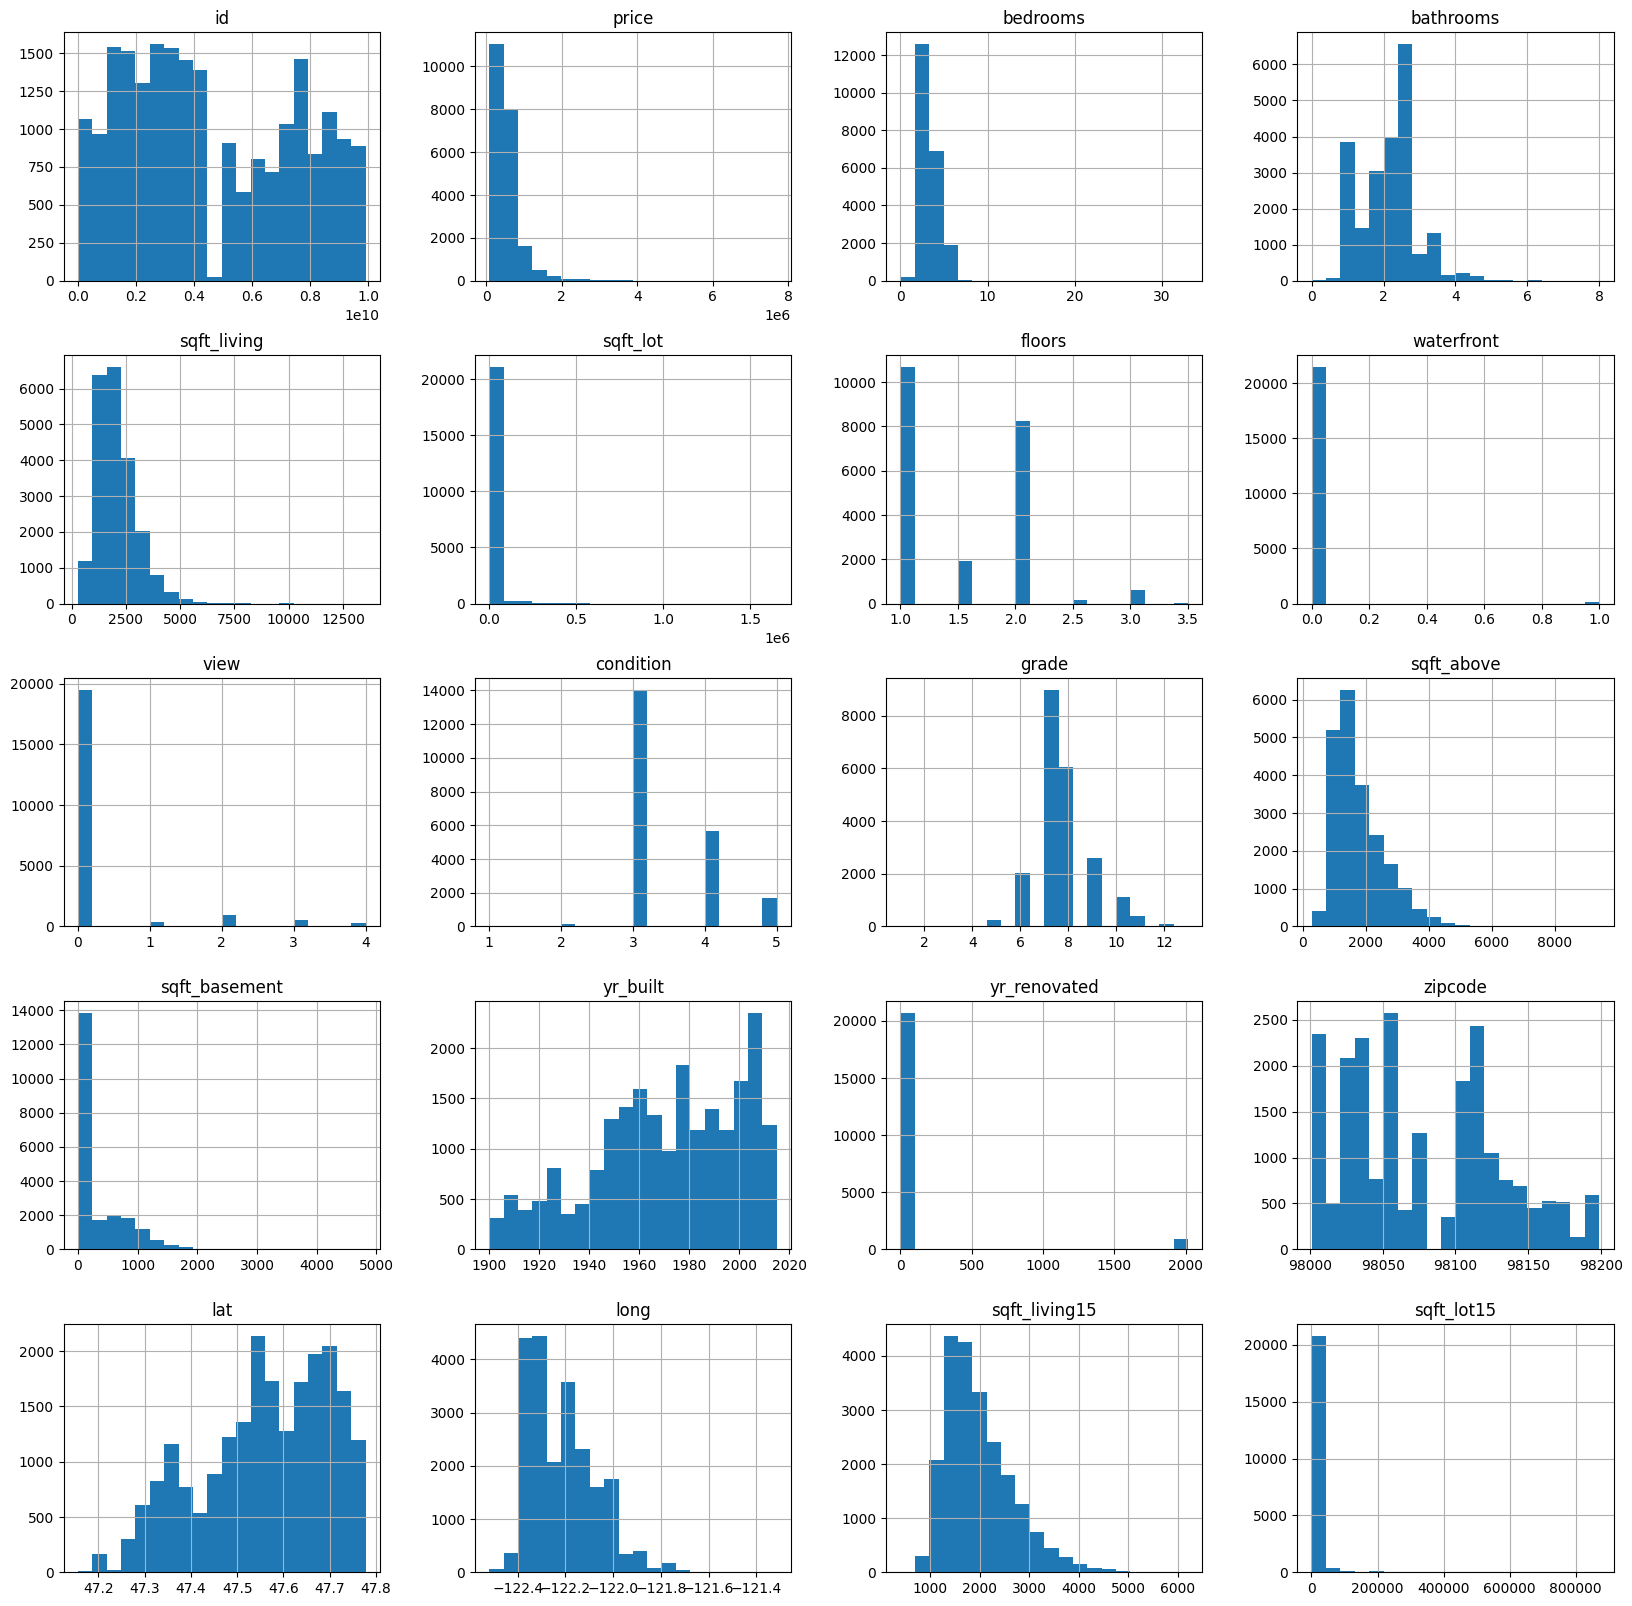

In [7]:
# visualizar histograma para cada coluna
house_df.hist(bins=20, figsize=(20, 20))
plt.show()

In [8]:
# excluir a coluna 'date' antes de calcular o mapa de calor
house_df = house_df.drop(columns=['date'])

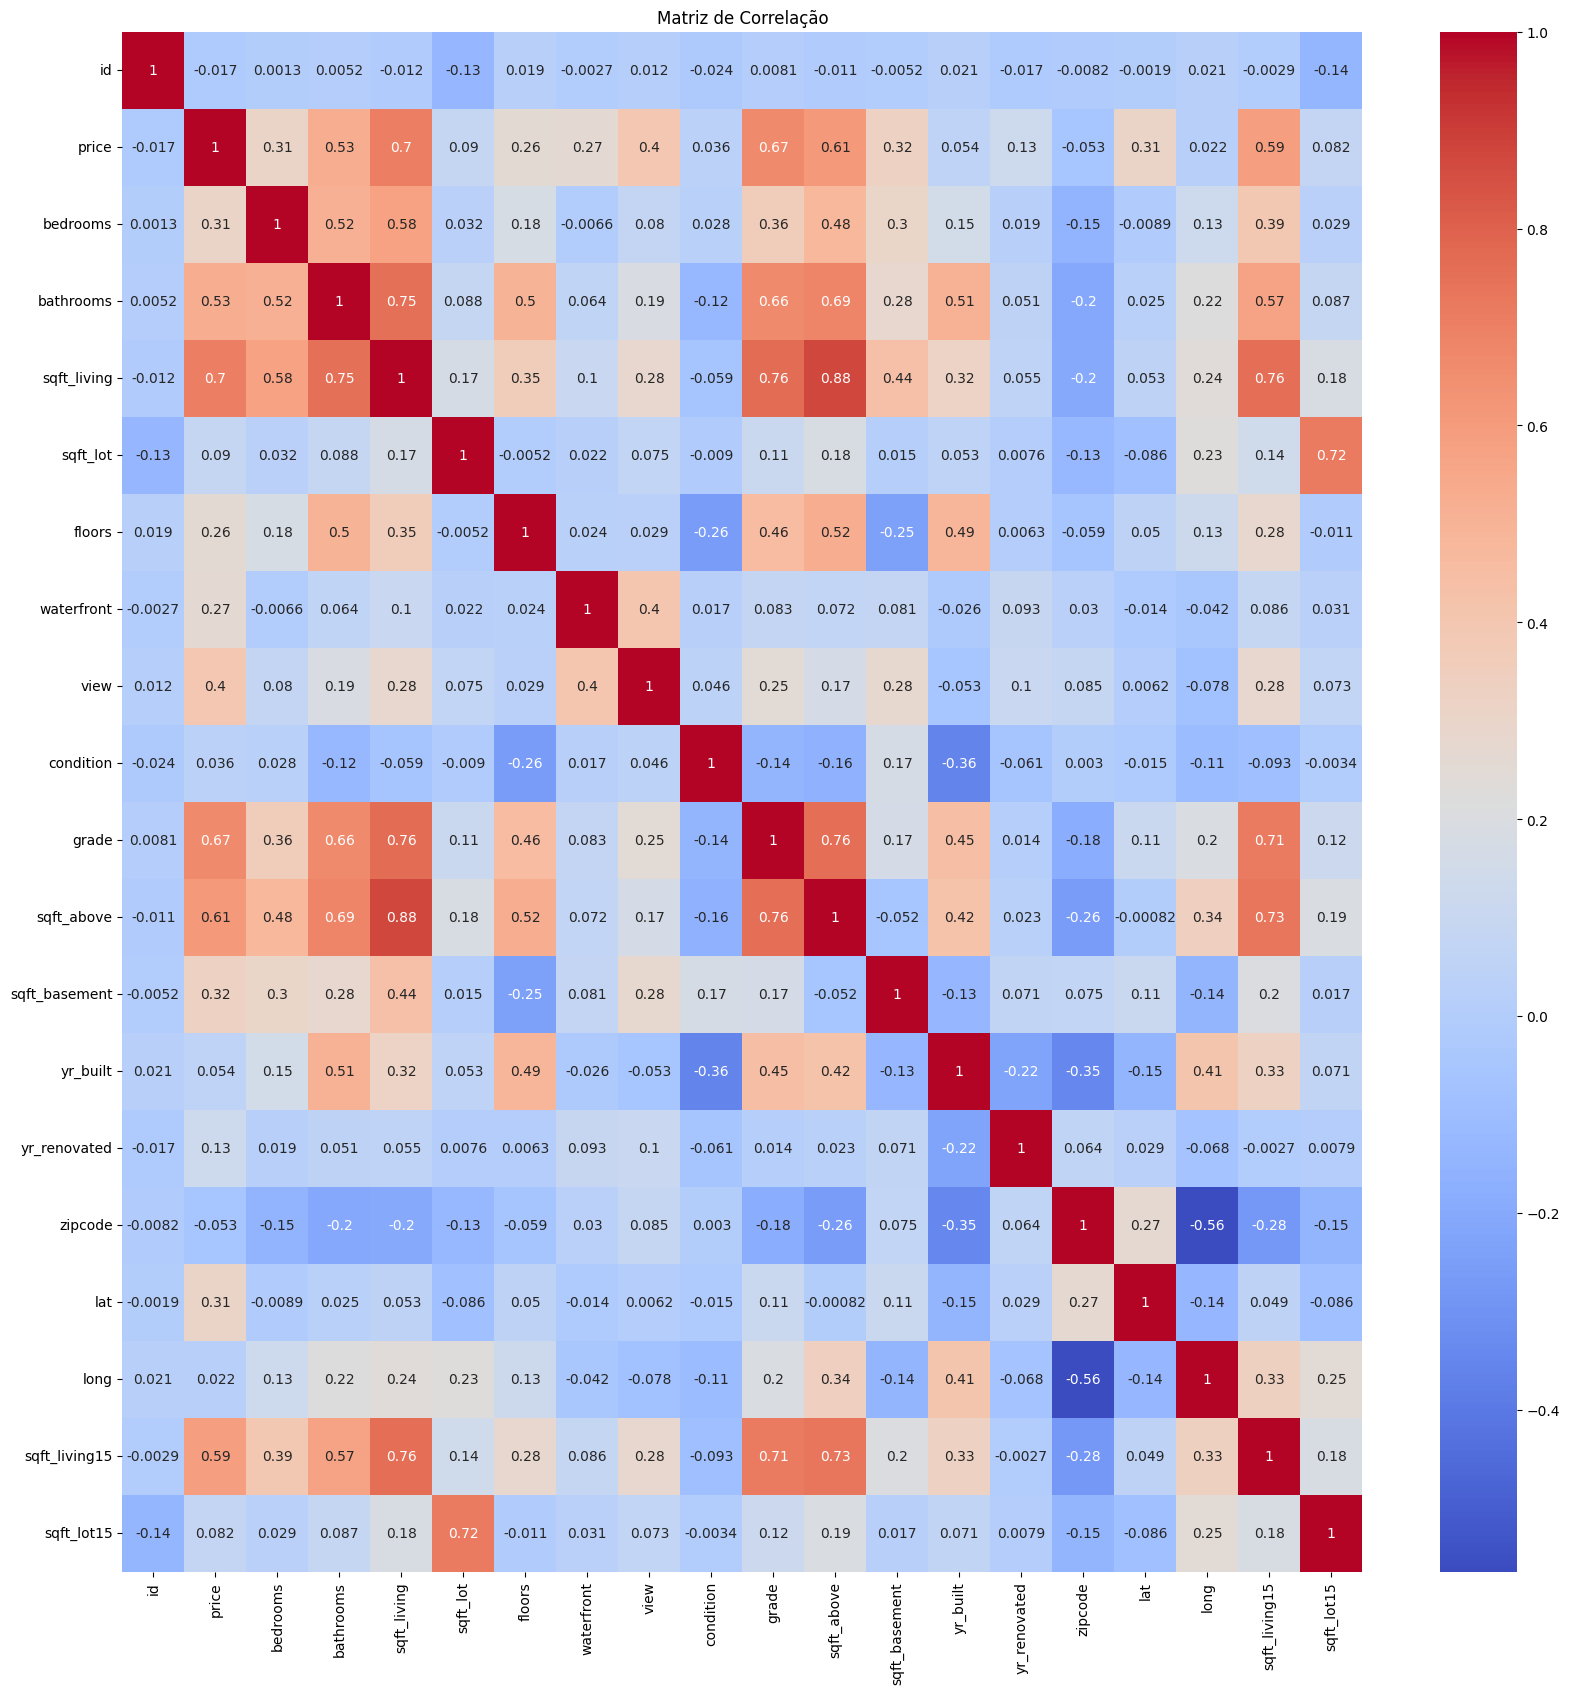

In [52]:
# visualizar mapa de calor para as variáveis numéricas
plt.figure(figsize=(20, 20))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# Etapa 4: Tratamento da base de dados

In [10]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

X = house_df[selected_features]

X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [11]:
X.shape

(21613, 7)

In [12]:
y = house_df['price']

y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [13]:
y.shape

(21613,)

## Etapa 4.1: Dimensionamento de recursos

Vamos importar `MinMaxScaler` do `sklearn.preprocessing` para normalizar as variáveis, já que os valores de `X` apresentam uma discrepância significativa entre si.

In [14]:
scaler = MinMaxScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [17]:
X_scaled.shape

(21613, 7)

In [18]:
y = y.values.reshape(-1,1)

In [19]:
y.shape

(21613, 1)

In [20]:
y_scaled = scaler.fit_transform(y)

In [21]:
y_scaled.shape

(21613, 1)

# Etapa 5: Construção e criação do modelo

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size= 0.25)

In [23]:
X_train.shape

(16209, 7)

In [24]:
X_test.shape

(5404, 7)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(7,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [28]:
#Coloquei o verbose=0, somente para que no github não fique enorme o notebook
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size= 50, validation_split= 0.2, verbose=0)

# Etapa 6: Avaliação do modelo

In [29]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

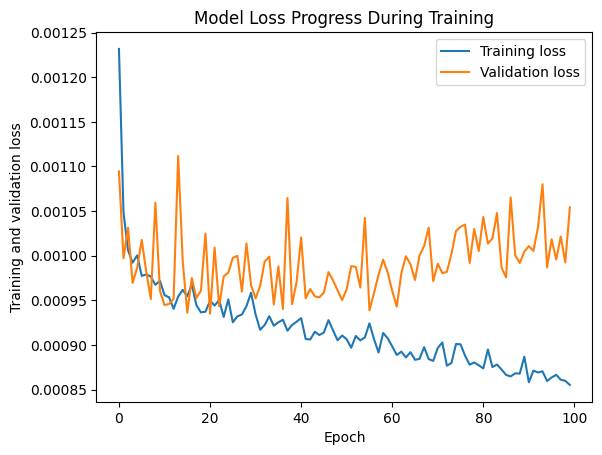

In [30]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss'])

## Etapa 6.1: Previsões dos preços

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(0, 0.5, 'True Values')

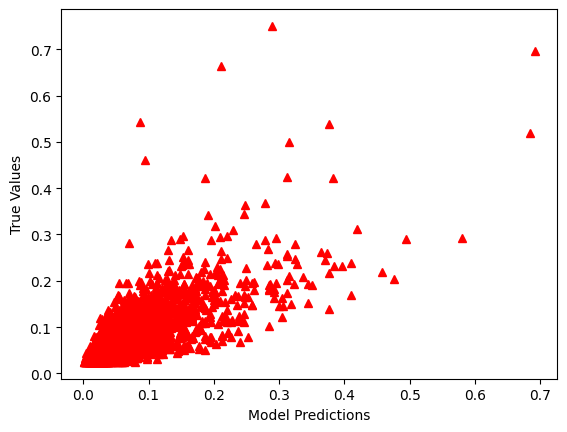

In [31]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [32]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[266165.5]], dtype=float32)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


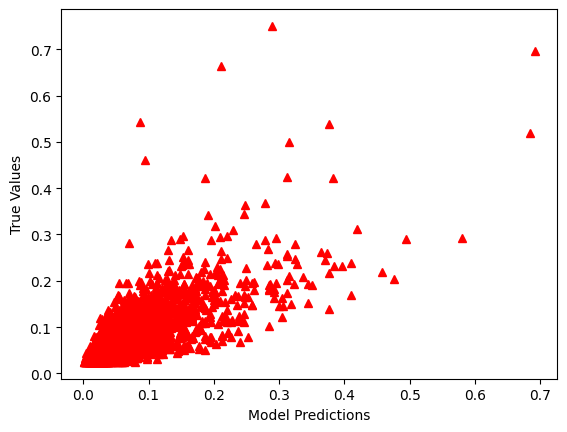

In [33]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values');

In [34]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

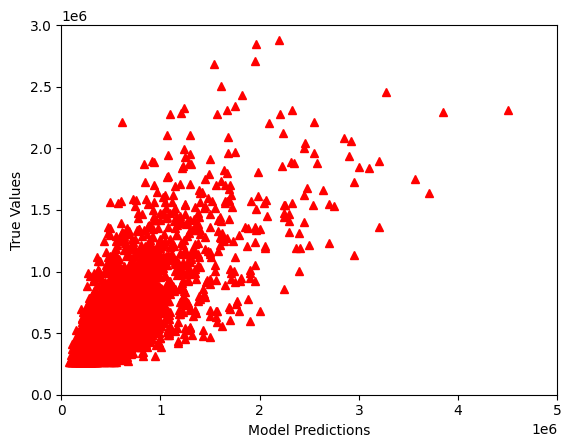

In [35]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [36]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [37]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 261471.576 
MSE = 68367385055.53186 
MAE = 166360.7305930792 
R2 = 0.5193999643211114 
Adjusted R2 = 0.5187765024512536


# Etapa 7: Aumento da quantidade de características

In [38]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,2170,400,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,770,0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,1050,910,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
scaler = MinMaxScaler()

In [40]:
X_scaled = scaler.fit_transform(X)

In [41]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [42]:
y = house_df['price']

In [43]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(len(selected_features),)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [46]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [47]:
epochs_hist= model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.2, verbose=0)

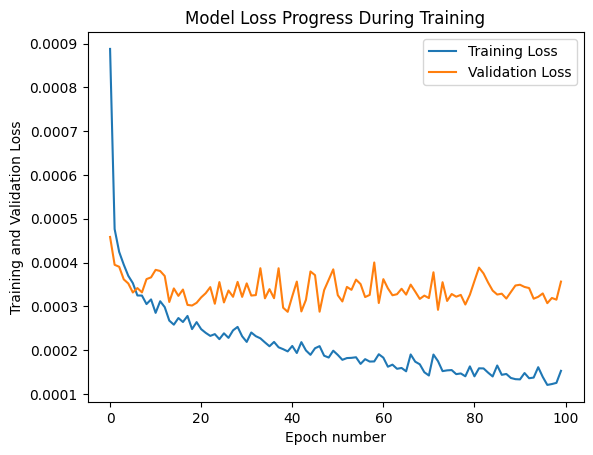

In [48]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss']);

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


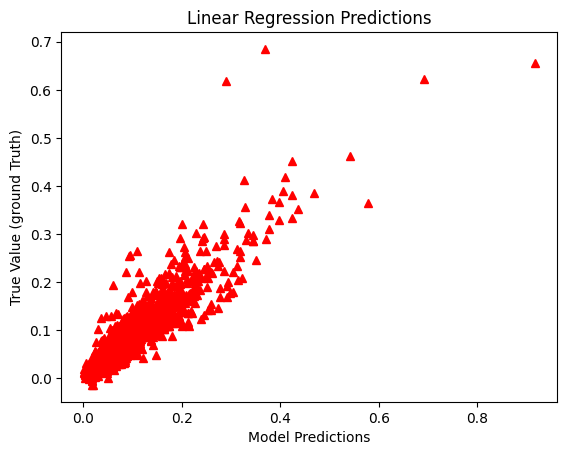

In [49]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [50]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [51]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 145433.819 
MSE = 21150995761.483807 
MAE = 82000.12725455103 
R2 = 0.8568369185242457 
Adjusted R2 = 0.8566511991820792
